In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from library.sb_utils import save_file

In [2]:
#load the trap data
filepath = '../data/trap_data_cleaned.csv'
df_traps = pd.read_csv(filepath, parse_dates=['Date'])
df_traps.head()

Date  Trap                 Species   Latitude  Longitude  \
0 2007-05-29  T002  CULEX PIPIENS/RESTUANS  41.954690 -87.800991   
1 2007-05-29  T002          CULEX RESTUANS  41.954690 -87.800991   
2 2007-05-29  T007          CULEX RESTUANS  41.994991 -87.769279   
3 2007-05-29  T015  CULEX PIPIENS/RESTUANS  41.974089 -87.824812   
4 2007-05-29  T015          CULEX RESTUANS  41.974089 -87.824812   

   NumMosquitos  NumTrapGroups  WnvPresent  NumWnvPresent  
0           1.0              1           0              0  
1           1.0              1           0              0  
2           1.0              1           0              0  
3           1.0              1           0              0  
4           4.0              1           0              0

In [3]:
#load the spray data
filepath = '../data/spray_data_cleaned.csv'
df_spray = pd.read_csv(filepath, parse_dates=['Date'])
df_spray.head()

Date        Time   Latitude  Longitude
0 2011-08-29  6:56:58 PM  42.391623 -88.089163
1 2011-08-29  6:57:08 PM  42.391348 -88.089163
2 2011-08-29  6:57:18 PM  42.391022 -88.089157
3 2011-08-29  6:57:28 PM  42.390637 -88.089158
4 2011-08-29  6:57:38 PM  42.390410 -88.088858

In [4]:
#load the weather data
filepath = '../data/weather_data_cleaned.csv'
df_weather = pd.read_csv(filepath, parse_dates=['Date'])
df_weather.head()

Date  Tmax_1  Tmin_1  Tavg_1  Tdepart_1  Tdew_point_1  Twet_bulb_1  \
0 2007-05-29      88      60      74         10            58           65   
1 2007-05-30      87      66      77         13            58           65   
2 2007-05-31      78      65      72          8            61           65   
3 2007-06-01      85      62      74         10            63           66   
4 2007-06-02      81      65      73          9            63           67   

   HeatDegDay_1  CoolDegDay_1  Sunrise_1  ...  Twet_bulb_2  HeatDegDay_2  \
0             0             9        421  ...           66             0   
1             0            12        420  ...           66             0   
2             0             7        420  ...           66             0   
3             0             9        419  ...           67             0   
4             0             8        419  ...           67             0   

   CoolDegDay_2  Sunrise_2  Sunset_2  PrecipTotal_2  StnPressure_2  \
0            12        421      1917          0.000          29.44   
1            15        420      1918          0.000          29.38   
2             9        420      1919          0.530          29.34   
3            12        419      1920          0.210          29.25   
4            10        419      1920          0.005          29.10   

   Wind_ResultSpeed_2  Wind_ResultDir_2  Wind_AvgSpeed_2  
0                 5.8                16              7.4  
1                 9.7                17             10.1  
2                 8.9                18              9.2  
3                 4.7                16              5.8  
4                 7.5                21              8.2  

[5 rows x 31 columns]

In [5]:
#load Chicago Map image
map_img = plt.imread('../Images/Map.PNG');

#Set Bounding Box for the Chicago Map image
BBox = (-88, -87.5, 41.6, 42.1)

#Load Chicago Map Outlier image
map_outlier_img = plt.imread('../Images/Map_Outlier.PNG');

#Set Bounding Box for the Chicago Map Outlier image
BBox_Outlier=(-88.2,-87.5,41.6,42.5)

## 2. Exploratory Data Analysis

## 2.1 Trap Data

**Summary Stats:**

In [6]:
#summary stats
df_traps.describe().T

count       mean        std        min        25%        50%  \
Latitude       8475.0  41.844618   0.106609  41.644612  41.750498  41.857402   
Longitude      8475.0 -87.694788   0.084063 -87.930995 -87.752329 -87.694991   
NumMosquitos   8475.0   8.434360  10.907160   1.000000   1.000000   4.000000   
NumTrapGroups  8475.0   1.239646   1.586030   1.000000   1.000000   1.000000   
WnvPresent     8475.0   0.053923   0.225880   0.000000   0.000000   0.000000   
NumWnvPresent  8475.0   0.065015   0.337489   0.000000   0.000000   0.000000   

                     75%        max  
Latitude       41.944869  42.017430  
Longitude     -87.642984 -87.531635  
NumMosquitos   10.000000  50.000000  
NumTrapGroups   1.000000  51.000000  
WnvPresent      0.000000   1.000000  
NumWnvPresent   0.000000  10.000000

**Distributions:**

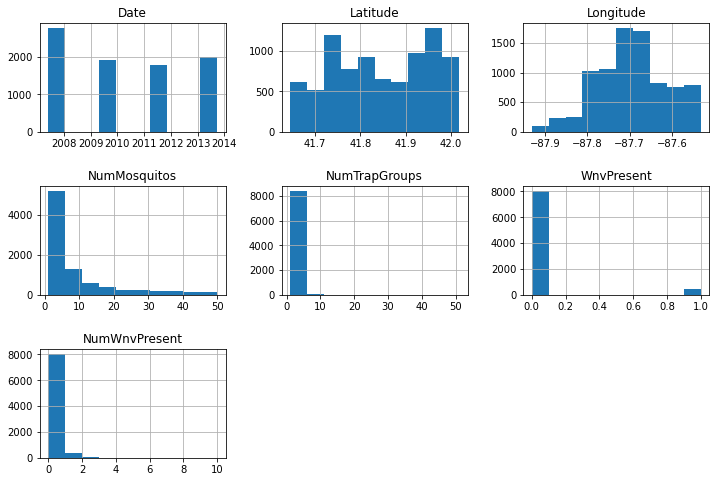

In [7]:
#plot histograms
df_traps.hist(figsize=(12,8))
plt.subplots_adjust(hspace=0.5);

**Correlation between Trap variables:**

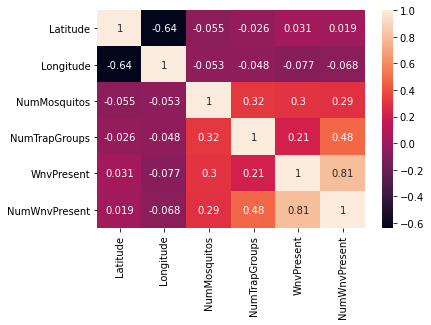

In [8]:
sns.heatmap(df_traps.corr(), annot=True);

Nothing here is surprising.

**Average Mosquito Count by West Nile Presence:**

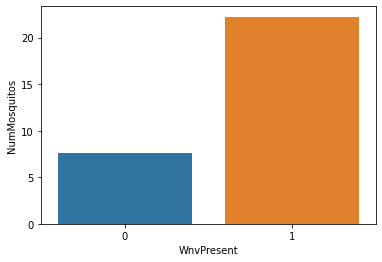

In [9]:
#plot average mosquito count for WnvPresent = 0,1
sns.barplot(data=df_traps, x='WnvPresent', y='NumMosquitos', ci=None);

As expected, it is more likely that West Nile will be present in a trap with more mosquitos.

**Average Number of Trap Groups by West Nile Presence:**

In [10]:
sns.barplot(data=df_traps,x='WnvPresent',y='NumTrapGroups',ci=None);

**West Nile Presence by Location:**

In [11]:
#Ensure each latitude pairs with only a single longitude
df_traps.groupby('Latitude')['Longitude'].nunique().sort_values(ascending=False)

Latitude
41.644612    1
41.923738    1
41.916265    1
41.918705    1
41.919343    1
            ..
41.771660    1
41.768388    1
41.766202    1
41.763733    1
42.017430    1
Name: Longitude, Length: 138, dtype: int64

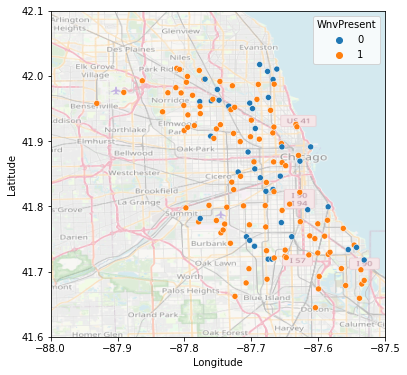

In [12]:
#Check West Nile Presence by location

fig, ax = plt.subplots(figsize = (6,6));
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

sns.scatterplot(x=df_traps.groupby(['Longitude','Latitude'])['WnvPresent'].max().index.get_level_values(0),
                y=df_traps.groupby(['Longitude','Latitude'])['WnvPresent'].max().index.get_level_values(1), 
                hue=df_traps.groupby(['Longitude','Latitude'])['WnvPresent'].max());

West Nile may be more likely to occur at lower longitudes and lower latitudes.

**West Nile Proportion by Year:**

In [13]:
map_year_proportion = {}

for year in df_traps['Date'].dt.year.unique():
    df_filter_year = df_traps[df_traps['Date'].dt.year == year]
    
    #proportion of traps with west nile
    proportion = df_filter_year['NumWnvPresent'].sum() / df_filter_year['NumTrapGroups'].sum()
    map_year_proportion[year] = proportion
   
sns.barplot(x=list(map_year_proportion.keys()), y=list(map_year_proportion.values()));

West Nile presence was much higher in 2007 and 2013. Add a year column to make comparisons by year. Was this due to mosquito count?

In [14]:
#add a year column
df_traps['Year'] = df_traps['Date'].dt.year.astype('category')


**Average NumMosquitos by Year:**

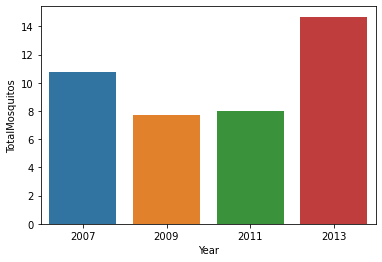

In [15]:
data = df_traps.groupby('Year').agg({'NumMosquitos':'mean','NumTrapGroups':'mean'}).reset_index()
data['TotalMosquitos'] = data['NumMosquitos'] * data['NumTrapGroups']
sns.barplot(data=data, x='Year',y='TotalMosquitos');

This higher West Nile presence in 2007, 2013 may be explained by higher mosquito numbers. Is this due to weather conditions?

**Categorical Data:**

In [16]:
#check categorical columns
df_traps.select_dtypes(exclude=[np.number]).columns

Index(['Date', 'Trap', 'Species', 'Year'], dtype='object')

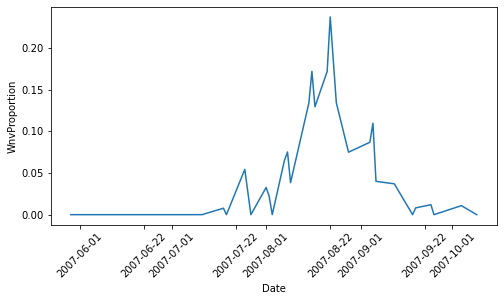

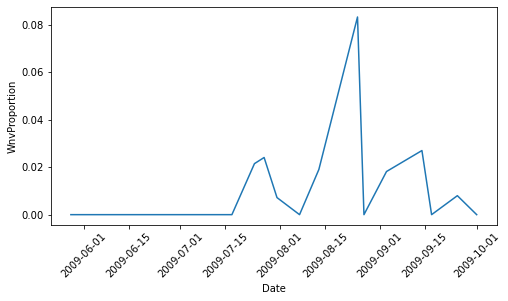

In [17]:
#look for West Nile proportion seasonality

data = df_traps.groupby('Date').agg({'NumWnvPresent':'sum','NumTrapGroups':'sum'})
data = data['NumWnvPresent'] / data['NumTrapGroups']
data = data.reset_index().rename(columns={0:'WnvProportion'})


for year in df_traps['Date'].dt.year.unique(): 
    year_data = data[data['Date'].dt.year == year]
    fig, ax = plt.subplots(figsize=(8,4))
    sns.lineplot(data=year_data, x='Date', y='WnvProportion')
    ax.tick_params(axis='x', rotation=45)



West Nile tends to show up roughly between mid July and the beginning of october. Within this window, West Nile can peak at different times. It is possible that these differences are caused by weather conditions (temperature, rainfall, etc.). It may be useful to introduce a month column.

In [18]:
#Introduce a month column
df_traps['Month'] = df_traps['Date'].dt.month.astype('category')

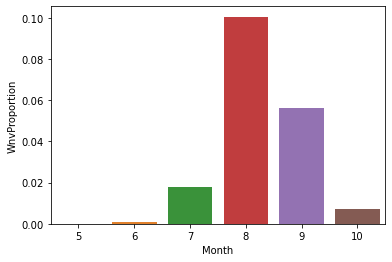

In [19]:
#look at West Nile proportion by month
data = df_traps.groupby('Month').agg({'NumWnvPresent':'sum','NumTrapGroups':'sum'})
data = data['NumWnvPresent'] / data['NumTrapGroups']
data = data.reset_index().rename(columns={0:'WnvProportion'})

sns.barplot(data=data,x='Month',y='WnvProportion');

August appears to be by far the worst month for West Nile. There is also significant West Nile in September. There were no cases in May.

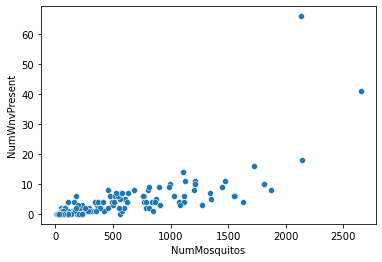

In [20]:
data = df_traps.groupby('Trap').agg({'NumMosquitos':'sum','NumWnvPresent':'sum'})
sns.scatterplot(data=data, x='NumMosquitos',y='NumWnvPresent');

As expected, more West Nile positives will be found in traps that catch more mosquitos. However, one trap seemed to have a very high West Nile positive count compared to the number of mosquitos it caught.

In [21]:
#Which Trap had the high West Nile/Times Checked Ratio?
trap = data.sort_values(by='NumWnvPresent').tail(1).index[0]
df_traps[df_traps['Trap'] == trap].head()

Date  Trap                 Species   Latitude  Longitude  \
2830 2009-05-28  T900          CULEX RESTUANS  41.974689 -87.890615   
2921 2009-06-03  T900  CULEX PIPIENS/RESTUANS  41.974689 -87.890615   
2922 2009-06-03  T900          CULEX RESTUANS  41.974689 -87.890615   
2997 2009-06-05  T900  CULEX PIPIENS/RESTUANS  41.974689 -87.890615   
2998 2009-06-05  T900          CULEX RESTUANS  41.974689 -87.890615   

      NumMosquitos  NumTrapGroups  WnvPresent  NumWnvPresent  Year Month  
2830     17.000000              2           0              0  2009     5  
2921     36.285714              7           0              0  2009     6  
2922     16.000000              5           0              0  2009     6  
2997      3.333333              3           0              0  2009     6  
2998      2.000000              1           0              0  2009     6

In [22]:
#is trap T900 at an extreme latitude?
df_traps.groupby('Trap')['Latitude'].first().sort_values()

Trap
T097    41.644612
T221    41.659112
T135    41.662014
T115    41.673408
T200    41.678618
          ...    
T008    42.008314
T233    42.009876
T018    42.010412
T016    42.011601
T148    42.017430
Name: Latitude, Length: 138, dtype: float64

In [23]:
#is trap T900 at an extreme longitude?
df_traps.groupby('Trap')['Longitude'].first().sort_values()

Trap
T903    -87.930995
T900    -87.890615
T0092   -87.862995
T011    -87.832763
T015    -87.824812
           ...    
T221    -87.538693
T103    -87.536497
T212    -87.535198
T100    -87.531657
T215    -87.531635
Name: Longitude, Length: 138, dtype: float64

The trap (T900) is located at the second lowest longitude. This supports the above finding that West Nile may be more likely to occur at low longitudes.

In [24]:
#did the trap catch more mosquitos than other traps?
df_traps.groupby('Trap')['NumMosquitos'].sum().sort_values()

Trap
T040       6.000000
T078      11.666667
T149      15.000000
T072      15.500000
T237      18.000000
           ...     
T008    1807.833333
T135    1867.866667
T900    2134.117145
T002    2144.252381
T115    2648.778408
Name: NumMosquitos, Length: 138, dtype: float64

The trap (T900) caught more mosquitos than all but one other trap. This could mean that more mosquitos are found at lower longitudes which would explain why more West Nile cases are found at lower longitudes.

In [25]:
df_traps.head()

Date  Trap                 Species   Latitude  Longitude  \
0 2007-05-29  T002  CULEX PIPIENS/RESTUANS  41.954690 -87.800991   
1 2007-05-29  T002          CULEX RESTUANS  41.954690 -87.800991   
2 2007-05-29  T007          CULEX RESTUANS  41.994991 -87.769279   
3 2007-05-29  T015  CULEX PIPIENS/RESTUANS  41.974089 -87.824812   
4 2007-05-29  T015          CULEX RESTUANS  41.974089 -87.824812   

   NumMosquitos  NumTrapGroups  WnvPresent  NumWnvPresent  Year Month  
0           1.0              1           0              0  2007     5  
1           1.0              1           0              0  2007     5  
2           1.0              1           0              0  2007     5  
3           1.0              1           0              0  2007     5  
4           4.0              1           0              0  2007     5

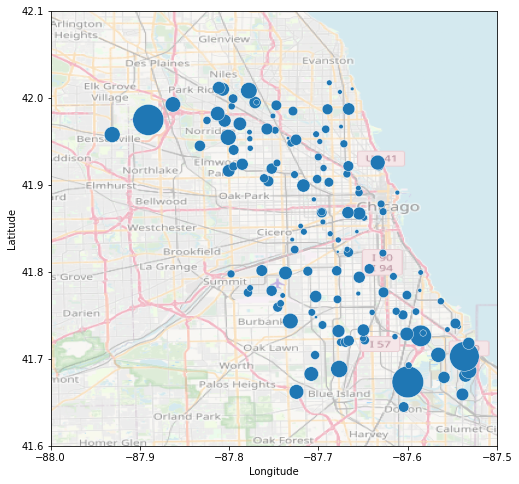

In [26]:
#How does mosquito count vary by region?
data = df_traps.groupby(['Latitude','Longitude']) \
    .agg({'NumMosquitos':'mean','NumTrapGroups':'mean'}).reset_index()
data['TotalMosquitos'] = data['NumMosquitos'] * data['NumTrapGroups']

fig, ax = plt.subplots(figsize=(8,8));
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

sns.scatterplot(data=data, x='Longitude',y='Latitude',size='TotalMosquitos', sizes=(1,1000));
ax.get_legend().remove()

There do appear to be some latitude/longitude regions (Northwest, Southeast) where more mosquitos are caught. However, these just may be traps that are checked more often. How does this compare to the number of times each trap was checked?.

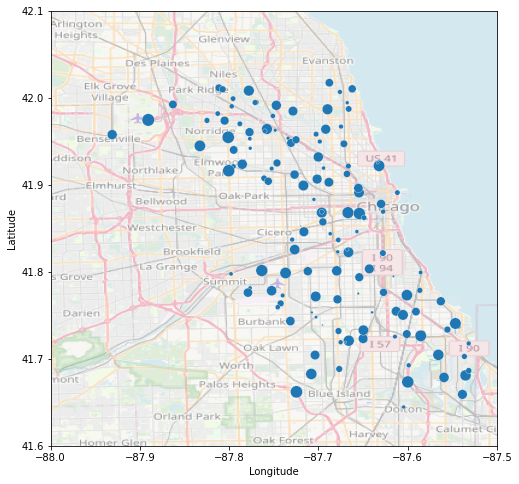

In [27]:
#Are latitude/longitude differences in mosquito count due to traps in certain regions being checked more than others
data = df_traps.groupby('Trap').agg({'Latitude':'first','Longitude':'first','Date':'count'}).reset_index()
data = data.rename(columns={'Date':'Count'})

fig, ax = plt.subplots(figsize=(8,8));
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

sns.scatterplot(data=data, x='Longitude',y='Latitude',size='Count', sizes=(2,154));
ax.get_legend().remove()

It does not appear that the extreme mosquito counts in the Northwest and Southeast are related to the number of unique days that traps were checked. This pattern may be due to spraying (spray will be examined below)

**Species:**

In [28]:
#check number of rows for each Species
df_traps.groupby('Species')['Date'].count().sort_values()

Species
CULEX ERRATICUS              1
CULEX TARSALIS               6
CULEX SALINARIUS            83
CULEX TERRITANS            216
CULEX PIPIENS             1950
CULEX RESTUANS            2393
CULEX PIPIENS/RESTUANS    3826
Name: Date, dtype: int64

In [29]:
#check if West Nile virus been found in all species
df_traps.groupby('Species').agg({'NumMosquitos':'sum','WnvPresent':'max'}) \
    .sort_values(by='NumMosquitos')

NumMosquitos  WnvPresent
Species                                         
CULEX ERRATICUS             7.000000           0
CULEX TARSALIS              7.000000           0
CULEX SALINARIUS          126.666667           0
CULEX TERRITANS           463.000000           0
CULEX RESTUANS          16102.459199           1
CULEX PIPIENS           16424.085423           1
CULEX PIPIENS/RESTUANS  38350.986790           1

West Nile virus was not found in four of the species. However, very few mosquitos of these species were trapped. Therefore, it is difficult to know whether there were no West Nile occurrences due to the species or due to the small number of samples. Therefore, species with no West Nile occurrences will be dropped.

In [30]:
#Drop the species with no West Nile occurrences
drop_list = \
    df_traps.groupby('Species')['WnvPresent'].max()[df_traps.groupby('Species')['WnvPresent'].max() == 0].index

drop_indices = df_traps[df_traps['Species'].isin(drop_list)].index

df_traps.drop(index=drop_indices, inplace=True)

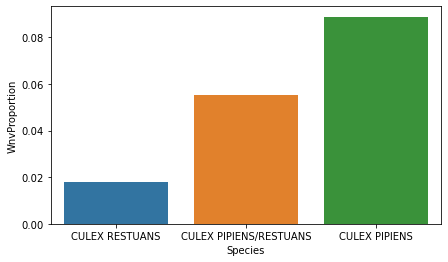

In [31]:
#check West Nile proportion by species
data = df_traps.groupby('Species').agg({'NumWnvPresent':'sum','NumTrapGroups':'sum'})
data = data['NumWnvPresent'] / data['NumTrapGroups']
data = data.reset_index().rename(columns={0:'WnvProportion'}).sort_values(by='WnvProportion')

fig, ax = plt.subplots(figsize=(7,4))
sns.barplot(data=data, x='Species', y='WnvProportion');

It appears that CULEX PIPIENS is more likely to be West Nile positive than CULEX RESTUANS.

## 2.2 Spray Data 

In [32]:
#summary stats
df_spray.describe().T

count       mean       std        min        25%        50%  \
Latitude   14835.0  41.904828  0.104381  41.713925  41.785001  41.940075   
Longitude  14835.0 -87.736690  0.067292 -88.096468 -87.794225 -87.727853   

                 75%        max  
Latitude   41.980978  42.395983  
Longitude -87.694108 -87.586727

**Spray Data Distributions:**

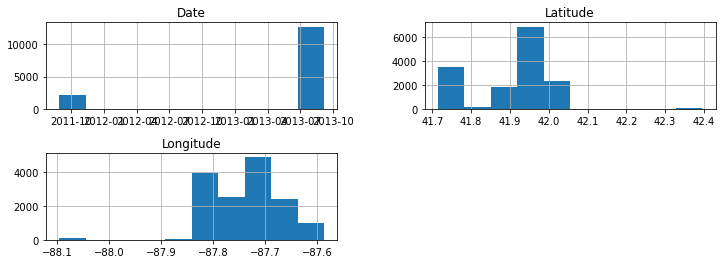

In [33]:
#plot histograms
df_spray.hist(figsize=(12,4))
plt.subplots_adjust(hspace=0.5);

Note that there is an outlier for both Latitude and Longitude. Was the outlier spray within range of the traps?

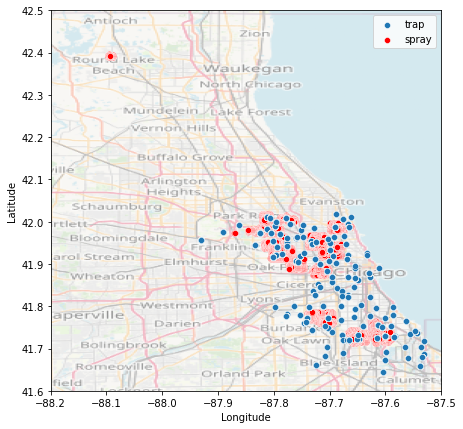

In [34]:
#Check the outlier spray
fig, ax = plt.subplots(figsize=(7,7));
ax.set_xlim(BBox_Outlier[0], BBox_Outlier[1])
ax.set_ylim(BBox_Outlier[2], BBox_Outlier[3])
ax.imshow(map_outlier_img, alpha=0.5, extent=BBox_Outlier, zorder=0, aspect='auto');

sns.scatterplot(data=df_traps, x='Longitude', y='Latitude', label='trap', zorder=2);
sns.scatterplot(data=df_spray, x='Longitude', y='Latitude', label='spray', zorder=1, color='red');

The outlier spray is not anywhere near the traps. Outliers can be dropped

In [35]:
#Drop the spray outliers
drop_indices = df_spray[df_spray['Latitude'] > 42.3].index
df_spray = df_spray.drop(drop_indices)

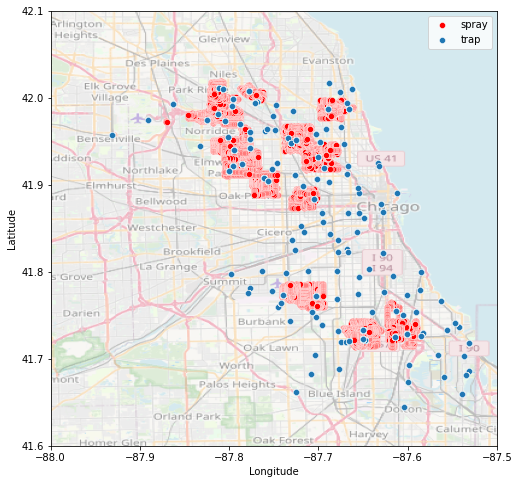

In [36]:
#Re-examing the spray map after removing outliers
fig, ax = plt.subplots(figsize=(8,8));
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

sns.scatterplot(data=df_spray, x='Longitude', y='Latitude', label='spray', color='red');
sns.scatterplot(data=df_traps, x='Longitude', y='Latitude', label='trap');

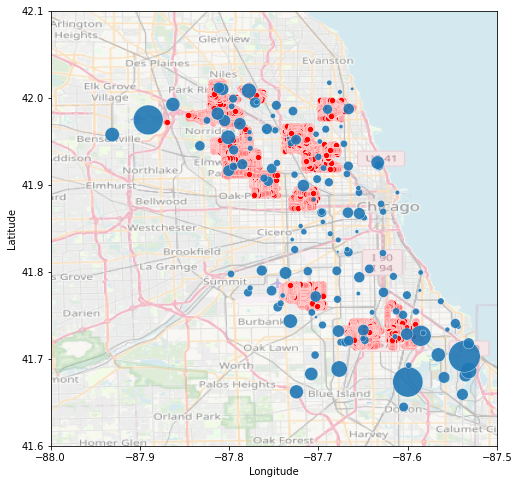

In [37]:
#How does mosquito count vary by region?
data = df_traps.groupby(['Latitude','Longitude']) \
    .agg({'NumMosquitos':'mean','NumTrapGroups':'mean'}).reset_index()
data['TotalMosquitos'] = data['NumMosquitos'] * data['NumTrapGroups']

fig, ax = plt.subplots(figsize=(8,8));
ax.set_xlim(BBox[0], BBox[1])
ax.set_ylim(BBox[2], BBox[3])
ax.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

sns.scatterplot(data=data, x='Longitude',y='Latitude',size='TotalMosquitos', sizes=(1,1000), zorder=2, alpha=0.9);
sns.scatterplot(data=df_spray, x='Longitude', y='Latitude', label='spray', color='red', zorder=1);
ax.get_legend().remove()

It appears that spraying not only reduced mosquito counts within the spray zones, but it may have also reduced mosquito counts in between spray zones. Mosquito counts increased drastically outside of these boundaries. Spraying does appear to have an impact on mosquito count. Therefore, it likely impacts West Nile presence. 

## 2.3 Weather Data

In [38]:
#summary stats
df_weather.describe().T

count         mean        std      min      25%      50%  \
Tmax_1              1225.0    76.548571  11.446000    44.00    69.00    79.00   
Tmin_1              1225.0    57.364898  10.235858    29.00    50.00    59.00   
Tavg_1              1225.0    67.205714  10.430370    37.00    60.00    69.00   
Tdepart_1           1225.0     2.071020   6.828957   -17.00    -3.00     2.00   
Tdew_point_1        1225.0    54.065306  10.588823    22.00    47.00    55.00   
Twet_bulb_1         1225.0    59.644082   9.242238    32.00    54.00    61.00   
HeatDegDay_1        1225.0     3.364082   5.866128     0.00     0.00     0.00   
CoolDegDay_1        1225.0     5.569796   6.072565     0.00     0.00     4.00   
Sunrise_1           1225.0   478.728163  63.960175   416.00   424.00   446.00   
Sunset_1            1225.0  1850.599184  85.240156  1647.00  1807.00  1901.00   
PrecipTotal_1       1225.0     0.135490   0.431190     0.00     0.00     0.00   
StnPressure_1       1225.0    29.251347   0.156275    28.55    29.16    29.26   
Wind_ResultSpeed_1  1225.0     6.920898   3.571017     0.10     4.30     6.30   
Wind_ResultDir_1    1225.0    17.484082  10.302212     1.00     7.00    19.00   
Wind_AvgSpeed_1     1225.0     8.480816   3.183752     2.10     6.10     8.00   
Tmax_2              1225.0    76.730612  11.394339    44.00    69.00    79.00   
Tmin_2              1225.0    59.391837  10.225078    29.00    52.00    61.00   
Tavg_2              1225.0    68.314286  10.486842    37.00    61.00    70.00   
Tdepart_2           1225.0     2.071020   6.828957   -17.00    -3.00     2.00   
Tdew_point_2        1225.0    53.857959  10.541208    23.00    47.00    55.00   
Twet_bulb_2         1225.0    59.933878   9.138533    33.00    54.00    61.00   
HeatDegDay_2        1225.0     2.997551   5.563140     0.00     0.00     0.00   
CoolDegDay_2        1225.0     6.311837   6.415163     0.00     0.00     5.00   
Sunrise_2           1225.0   478.728163  63.960175   416.00   424.00   446.00   
Sunset_2            1225.0  1850.599184  85.240156  1647.00  1807.00  1901.00   
PrecipTotal_2       1225.0     0.122959   0.346460     0.00     0.00     0.00   
StnPressure_2       1225.0    29.311298   0.155230    28.63    29.22    29.31   
Wind_ResultSpeed_2  1225.0     6.860653   3.576364     0.30     4.20     6.40   
Wind_ResultDir_2    1225.0    17.235918   9.962135     1.00     7.00    19.00   
Wind_AvgSpeed_2     1225.0     8.490204   3.100016     1.70     6.30     8.00   

                        75%      max  
Tmax_1                85.00   103.00  
Tmin_1                65.00    82.00  
Tavg_1                75.00    93.00  
Tdepart_1              7.00    23.00  
Tdew_point_1          62.00    75.00  
Twet_bulb_1           67.00    78.00  
HeatDegDay_1           5.00    28.00  
CoolDegDay_1          10.00    28.00  
Sunrise_1            529.00   623.00  
Sunset_1            1923.00  1931.00  
PrecipTotal_1          0.06     6.86  
StnPressure_1         29.35    29.79  
Wind_ResultSpeed_1     9.00    24.10  
Wind_ResultDir_1      26.00    36.00  
Wind_AvgSpeed_1       10.20    26.30  
Tmax_2                85.00   104.00  
Tmin_2                67.00    83.00  
Tavg_2                76.00    94.00  
Tdepart_2              7.00    23.00  
Tdew_point_2          62.00    74.00  
Twet_bulb_2           67.00    77.00  
HeatDegDay_2           4.00    28.00  
CoolDegDay_2          11.00    29.00  
Sunrise_2            529.00   623.00  
Sunset_2            1923.00  1931.00  
PrecipTotal_2          0.05     4.73  
StnPressure_2         29.41    29.86  
Wind_ResultSpeed_2     9.10    20.80  
Wind_ResultDir_2      24.00    36.00  
Wind_AvgSpeed_2       10.30    22.10

## 2.1.6 Weather Data Distributions

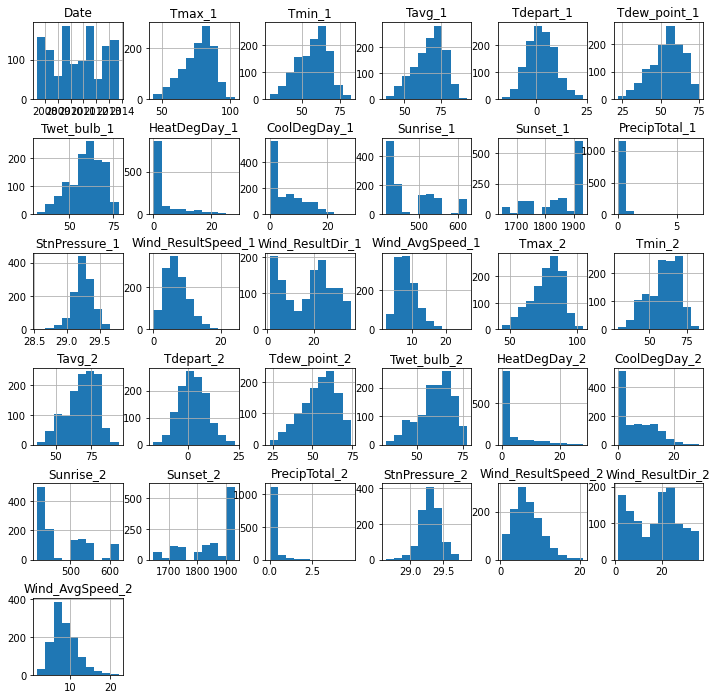

In [39]:
#plot histograms
df_weather.hist(figsize=(12,12))
plt.subplots_adjust(hspace=0.5);

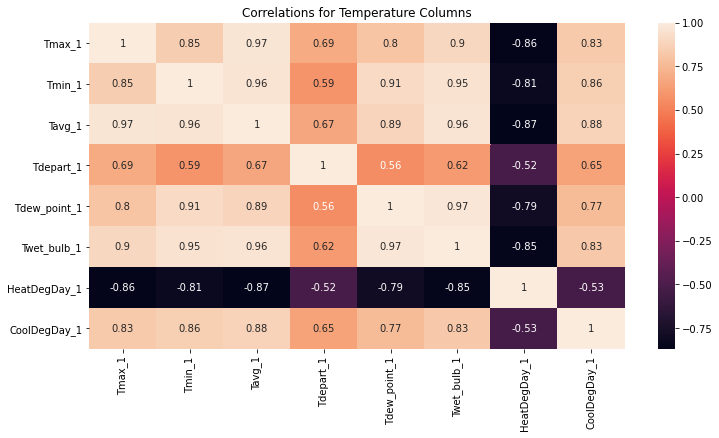

In [40]:
#look at correlations within the temperature columns - weather station 1
columns = ['Tmax_1','Tmin_1','Tavg_1','Tdepart_1','Tdew_point_1','Twet_bulb_1','HeatDegDay_1','CoolDegDay_1']

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_weather[columns].corr(), annot=True);
ax.set_title('Correlations for Temperature Columns');

In [41]:
#look at correlations within the temperature columns - weather station 2
columns = ['Tmax_2','Tmin_2','Tavg_2','Tdepart_2','Tdew_point_2','Twet_bulb_2','HeatDegDay_2','CoolDegDay_2']

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(df_weather[columns].corr(), annot=True);
ax.set_title('Correlations for Temperature Columns');

As expected, the temperature columns are highly correlated with each other. Tdepart (representing the temperature's departure from normal) shows less correlation than other columns. Tdepart and Tavg will be kept. Tavg should capture most of the information in all columns except for Tdepart.

In [42]:
#drop all temperature columns except Tavg and Tdepart
columns = ['Tmax_1','Tmin_1','Tdew_point_1','Twet_bulb_1','HeatDegDay_1','CoolDegDay_1', \
           'Tmax_2','Tmin_2','Tdew_point_2','Twet_bulb_2','HeatDegDay_2','CoolDegDay_2']
df_weather.drop(columns=columns, axis=1, inplace=True)

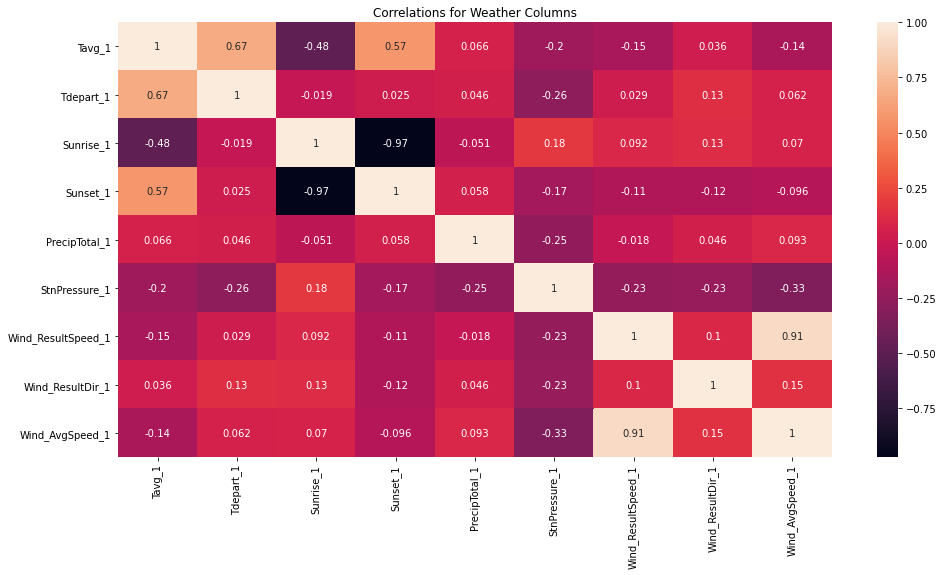

In [43]:
#correlations between all columns - station 1

columns = [column for column in df_weather.columns if column.endswith('_1')]

fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_weather[columns].corr(), annot=True);
ax.set_title('Correlations for Weather Columns');

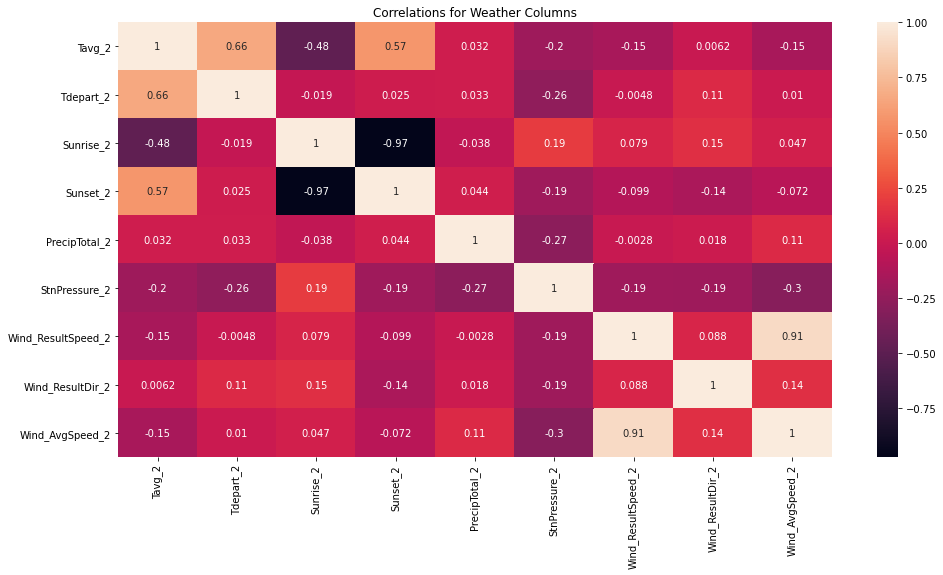

In [44]:
#correlations between all columns - station 2

columns = [column for column in df_weather.columns if column.endswith('_2')]

fig, ax = plt.subplots(figsize=(16,8))
sns.heatmap(df_weather[columns].corr(), annot=True);
ax.set_title('Correlations for Weather Columns');

Resultant wind speed and average wind speed are highly correlated. The resultant wind speed column can be dropped.

In [45]:
columns = ([column for column in df_weather.columns if column.startswith('Wind_ResultSpeed')])
df_weather.drop(columns=columns, inplace=True)

## Combine the Data

**Combine the traps and weather data:**

In [46]:
df = pd.merge(df_traps,df_weather,on='Date', how='left')

**Combine the spray data:**

In [47]:
#function to calculate Euclidean distance
def euclid_distance(Latitude1,Latitude2,Longitude1,Longitude2):
    return np.sqrt(np.abs(Latitude1-Latitude2)**2 + np.abs(Longitude1-Longitude2)**2)

In [48]:
#get all combinations of trap and spray records
trap_coordinates = df.groupby('Trap').agg({'Latitude':'first','Longitude':'first'}).reset_index()

trap_spray_combos = pd.merge(trap_coordinates.assign(dummy=1), df_spray.assign(dummy=1), on='dummy',
                    suffixes=['_trap','_spray']).drop('dummy',axis=1)

#calculate distance (Euclidean) between each trap and spray combination
trap_spray_combos['TrapSprayDistance'] = euclid_distance(trap_spray_combos['Latitude_trap'],
                                                         trap_spray_combos['Latitude_spray'],
                                                         trap_spray_combos['Longitude_trap'],
                                                         trap_spray_combos['Longitude_spray'])

#for each trap, for each spray date get the minimum distance between the trap coordinates and spray coordinates
trap_spray_distance = trap_spray_combos.groupby(['Date','Trap']).agg({'TrapSprayDistance':'min'}).reset_index()

#drop rows where traps are not near spray zones
trap_spray_distance.drop(
    trap_spray_distance[~ (trap_spray_distance['TrapSprayDistance'] < 0.0075)].index,
    inplace=True
)

#The Distance column is no longer needed
trap_spray_distance.drop(columns=['TrapSprayDistance'], inplace=True)

#add a column to indicate the date 30 days after the spray date
trap_spray_distance['SprayDatePlus30'] = trap_spray_distance['Date'] + pd.DateOffset(days=30)
trap_spray_distance.rename(columns={'Date':'SprayDate'},inplace=True)

#Initialize IsSprayed column in the traps dataframe
df['IsSprayed'] = 0

#Merge the spray data with the trap data
df = pd.merge(df,trap_spray_distance,left_on='Trap',right_on='Trap',how='left')

#set the indicator to 1 for sprayed traps: 
# assume traps within spray region are sprayed if it is within 30 days of the spraying
df.loc[(df['SprayDate'] < df['Date']) & 
             (df['Date'] < df['SprayDatePlus30']),
            'IsSprayed'] = 1

#drop the unneeded columns
df.drop(columns=['SprayDate','SprayDatePlus30'],inplace=True)

#drop the duplicate rows resulting from the merge
df.drop_duplicates(inplace=True)

**Drop Unneeded Columns:**

In [49]:
df.columns

Index(['Date', 'Trap', 'Species', 'Latitude', 'Longitude', 'NumMosquitos',
       'NumTrapGroups', 'WnvPresent', 'NumWnvPresent', 'Year', 'Month',
       'Tavg_1', 'Tdepart_1', 'Sunrise_1', 'Sunset_1', 'PrecipTotal_1',
       'StnPressure_1', 'Wind_ResultDir_1', 'Wind_AvgSpeed_1', 'Tavg_2',
       'Tdepart_2', 'Sunrise_2', 'Sunset_2', 'PrecipTotal_2', 'StnPressure_2',
       'Wind_ResultDir_2', 'Wind_AvgSpeed_2', 'IsSprayed'],
      dtype='object')

In [50]:
drop_list = ['Tdepart_1',
             'Sunrise_1',
             'Sunset_1',
             'Tdepart_2',
             'Sunrise_2',
             'Sunset_2']
df.drop(columns=drop_list, inplace=True)             

## WnvPresent by Weather:

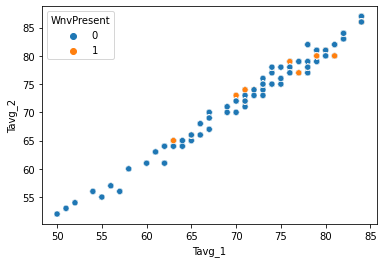

In [51]:
#how does West Nile presence vary by temperature
sns.scatterplot(data=df, x='Tavg_1', y='Tavg_2', hue='WnvPresent');

West Nile Virus seem to be found above roughly 62 Farenheight. Higher temperatures appear to favour West Nile.

In [52]:
#how does West Nile presence vary by station pressure
sns.scatterplot(data=df, x='StnPressure_1', y='StnPressure_2', hue='WnvPresent');

West Nile seems to be found in the midrange of station pressure values. This is likely due to the frequency of these pressure values.

In [53]:
#drop the StnPressure columns
drop_list = ['StnPressure_1', 'StnPressure_2']
df.drop(columns=drop_list, inplace=True)  

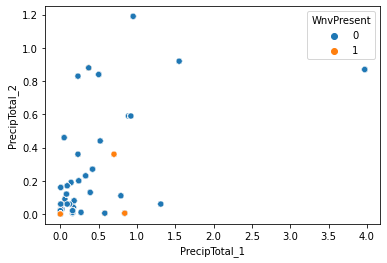

In [54]:
#how does West Nile presence vary by precipitation
sns.scatterplot(data=df, x='PrecipTotal_1', y='PrecipTotal_2', hue='WnvPresent');

Lower precipitation levels appear to favour West Nile

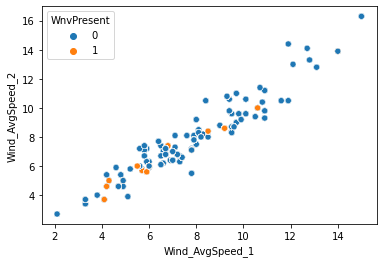

In [55]:
#how does West Nile presence vary by WindSpeed
sns.scatterplot(data=df, x='Wind_AvgSpeed_1', y='Wind_AvgSpeed_2', hue='WnvPresent');

Wnv tends to be present at lower wind speeds

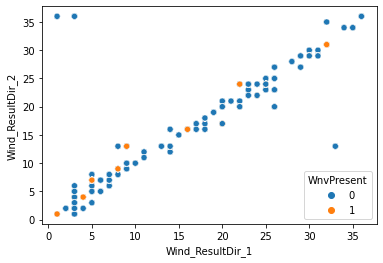

In [56]:
#how does West Nile presence vary by Wind Direction
sns.scatterplot(data=df, x='Wind_ResultDir_1', y='Wind_ResultDir_2', hue='WnvPresent');

Wind Direction does not appear to have an effect on West Nile presence

In [57]:
#drop the Wind_ResultDir columns
drop_list = ['Wind_ResultDir_1', 'Wind_ResultDir_2']
df.drop(columns=drop_list, inplace=True)  

## Wnv Proportion by Weather

**Temperature:**

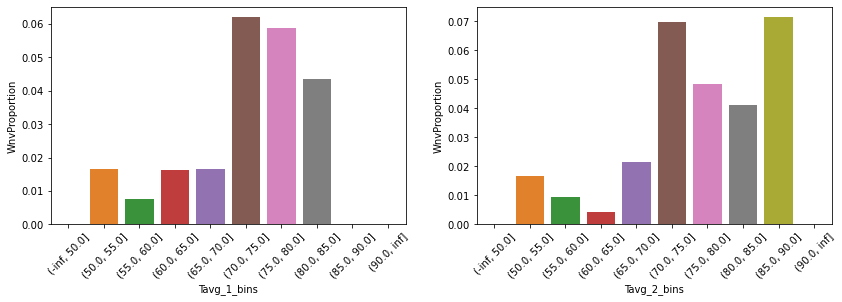

In [58]:

aggregations = {
    'NumTrapGroups':'sum',
    'NumWnvPresent':'sum',
    'Tavg_1':'first',
    'Tavg_2':'first',
}

data = df.groupby(['Date']).agg(aggregations)
data = data.reset_index()
data['WnvProportion'] = data['NumWnvPresent'] / data['NumTrapGroups']


temp_bins = [-np.inf,50,55,60,65,70,75,80,85,90,np.inf]
data['Tavg_1_bins'] = pd.cut(data['Tavg_1'], temp_bins)
data['Tavg_2_bins'] = pd.cut(data['Tavg_2'], temp_bins)

data1 = data.groupby('Tavg_1_bins')['WnvProportion'].mean().reset_index()
data2 = data.groupby('Tavg_2_bins')['WnvProportion'].mean().reset_index()

fig,ax = plt.subplots(1,2, figsize=(14,4));
sns.barplot(data=data1, x='Tavg_1_bins',y='WnvProportion', ax=ax[0], ci=None);
sns.barplot(data=data2, x='Tavg_2_bins',y='WnvProportion', ax=ax[1], ci=None);
for a in ax:
    a.tick_params(axis='x', rotation=45)


West Nile Presence occurs more frequently at higher temperatures - especially above 70 degrees. However, among higher temperatures West Nile proportion tends to be greatest in the 70-75 degree range.

**Precipitation:**

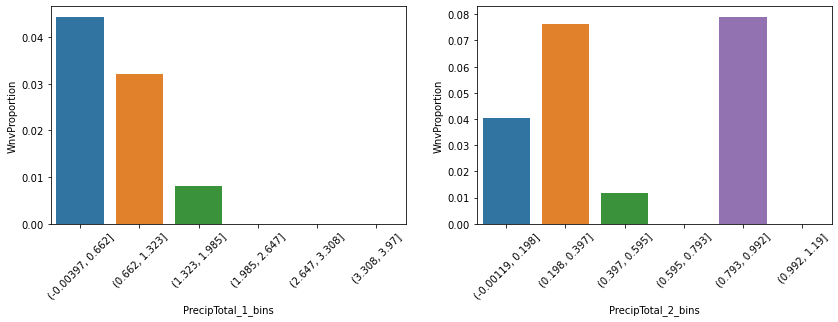

In [59]:
aggregations = {
    'NumTrapGroups':'sum',
    'NumWnvPresent':'sum',
    'PrecipTotal_1':'first',
    'PrecipTotal_2':'first'
}

data = df.groupby(['Date']).agg(aggregations)
data = data.reset_index()
data['WnvProportion'] = data['NumWnvPresent'] / data['NumTrapGroups']


data['PrecipTotal_1_bins'] = pd.cut(data['PrecipTotal_1'], 6)
data['PrecipTotal_2_bins'] = pd.cut(data['PrecipTotal_2'], 6)

data1 = data.groupby('PrecipTotal_1_bins')['WnvProportion'].mean().reset_index()
data2 = data.groupby('PrecipTotal_2_bins')['WnvProportion'].mean().reset_index()

fig,ax = plt.subplots(1,2, figsize=(14,4));
sns.barplot(data=data1, x='PrecipTotal_1_bins',y='WnvProportion', ax=ax[0], ci=None);
sns.barplot(data=data2, x='PrecipTotal_2_bins',y='WnvProportion', ax=ax[1], ci=None);
for a in ax:
    a.tick_params(axis='x', rotation=45)

The two weather stations initially do not appear to have the same trend in WnvProportion by precipitation. However, when looking at the x-axis, weather station 2 did not capture high precipitation days. The precipitation range at weather station 2 was 0-1.19, while weather station 1 had a range of 0-3.97. Therefore, station 1 may provide a more reliable indicator of how a range of precipitation levels impact West Nile's presence. Station 1 shows WnvProportion trending down as rainfall increases. 

In [60]:
# West Nile proportion by precipitation on the same chart for both Weather Stations,
# so that the trend can be observed with a constant axis
aggregations = {
    'NumTrapGroups':'sum',
    'NumWnvPresent':'sum',
    'PrecipTotal_1':'first',
    'PrecipTotal_2':'first'
}
data = df.groupby(['Date']).agg(aggregations).reset_index()
data = pd.melt(data,id_vars=['Date','NumTrapGroups','NumWnvPresent']).rename(columns={'value':'PrecipTotal'})
data['WnvProportion'] = data['NumWnvPresent'] / data['NumTrapGroups']

data['PrecipTotal_bins'] = pd.cut(data['PrecipTotal'], 6)

fig,ax = plt.subplots(figsize=(7,4));
sns.barplot(data=data, x='PrecipTotal_bins',y='WnvProportion', ci=None);

ax.tick_params(axis='x', rotation=45)


Here the precipitation trend, accounting for both weather stations, can be seen much more clearly. West Nile tends to occur at lower precipitation levels 

**Wind Speed:**

In [61]:
aggregations = {
    'NumTrapGroups':'sum',
    'NumWnvPresent':'sum',
    'Wind_AvgSpeed_1':'first',
    'Wind_AvgSpeed_2':'first',
}

data = df.groupby(['Date']).agg(aggregations)
data = data.reset_index()
data['WnvProportion'] = data['NumWnvPresent'] / data['NumTrapGroups']

data['Wind_AvgSpeed_1_bins'] = pd.cut(data['Wind_AvgSpeed_1'], 5)
data['Wind_AvgSpeed_2_bins'] = pd.cut(data['Wind_AvgSpeed_2'], 5)

data1 = data.groupby('Wind_AvgSpeed_1_bins')['WnvProportion'].mean().reset_index()
data2 = data.groupby('Wind_AvgSpeed_2_bins')['WnvProportion'].mean().reset_index()

fig,ax = plt.subplots(1,2, figsize=(14,4));
sns.barplot(data=data1, x='Wind_AvgSpeed_1_bins',y='WnvProportion', ax=ax[0], ci=None);
sns.barplot(data=data2, x='Wind_AvgSpeed_2_bins',y='WnvProportion', ax=ax[1], ci=None);
for a in ax:
    a.tick_params(axis='x', rotation=45)


WnvProportion tend to decrease as wind speed increases. The trend is especially strong at weather station 2.

## Weather by Year

It was observed above that 2007, 2013 had a much higher presence of West Nile than 2009, 2011. Can this be explained by the weather?

**Temperature:**

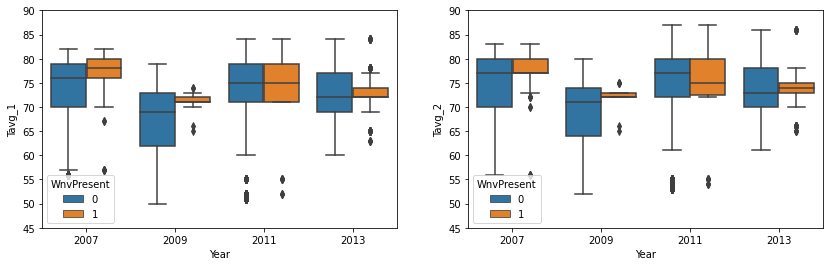

In [62]:
fig,ax = plt.subplots(1,2, figsize=(14,4))

#adjust y-axis so comparisons are equivalent
for a in ax:
    a.set_ylim(45,90)

sns.boxplot(data=df,x='Year',y='Tavg_1',hue='WnvPresent', ax=ax[0]);
sns.boxplot(data=df,x='Year',y='Tavg_2',hue='WnvPresent', ax=ax[1]);

Lower temperature is a possible explanation for why there was a lower West Nile presence in 2009. This also supports the above finding that West Nile tends to be present at higher temperatures.

**Precipitation:**

In [63]:
fig,ax = plt.subplots(1,2, figsize=(14,8))

#adjust y-axis so comparisons are equivalent
for a in ax:
    a.set_ylim(0,4.5)

sns.boxplot(data=df,x='Year',y='PrecipTotal_1',hue='WnvPresent', ax=ax[0]);
sns.boxplot(data=df,x='Year',y='PrecipTotal_2',hue='WnvPresent',ax=ax[1]);

Both weather stations indicate that 2011 had low precipitation compared to the other years. This may explain why West Nile presence was low in 2011. 

Interestingly, weather station 1 showed that 2007 and 2013 had higher precipitation levels. This aligns with the years that had higher West Nile presence. This would seem to contrast the findings above. It is possible that mosquitos like moist conditions (years with higher precipitation) but are less active on days that are raining.

**Wind Speed:**

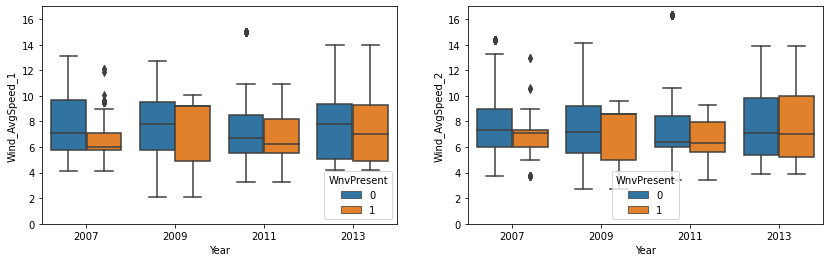

In [64]:
fig,ax = plt.subplots(1,2, figsize=(14,4))

#adjust y-axis so comparisons are equivalent
for a in ax:
    a.set_ylim(0,17)

sns.boxplot(data=df,x='Year',y='Wind_AvgSpeed_1',hue='WnvPresent', ax=ax[0]);
sns.boxplot(data=df,x='Year',y='Wind_AvgSpeed_2',hue='WnvPresent', ax=ax[1]);

As noted above, lower wind speeds seem to favour West Nile. This may be due to the fact that it is easier for mosquitos to fly in lower winds, making it more likely that they will "go out" and get caught in traps.

## Effects of Spray:

**Number of mosquitos over time:**

In [65]:
sprayed_traps = df[df['IsSprayed'] == 1]['Trap'].unique()
figsize = (10, len(sprayed_traps)*5)
fig, ax = plt.subplots(len(sprayed_traps),1, figsize=figsize)
ax_count = 0
for trap in sprayed_traps:
    sprayed_years = df[(df['Trap'] == trap) & (df['IsSprayed'] == 1)]['Year'].unique()
    for year in sprayed_years:
        data = df[(df['Trap']==trap) & (df['Year'] == year)]
        data = data.groupby('Date').agg({'NumMosquitos':'mean','NumTrapGroups':'sum','IsSprayed':'max'}).reset_index()
        data['TotalMosquitos'] = data['NumMosquitos'] * data['NumTrapGroups']
        first_after_spray_date = data[data['IsSprayed'] == 1]['Date'].min()
        
        start_date = dt.date(year,6,1)
        end_date = dt.date(year,10,1)
        ax[ax_count].set_xlim([start_date,end_date])
        
        sns.lineplot(data=data, x='Date',y='TotalMosquitos', ci=None, ax=ax[ax_count]);
        ax[ax_count].axvline(first_after_spray_date, color='red', linestyle='--')
        ax_count += 1

Spraying did not seem to have a predictable effect on mosquito count over time. This could be because the traps are not always checked right after being sprayed.

**Number of mosquitos and WnvProportion - before/after spray:**

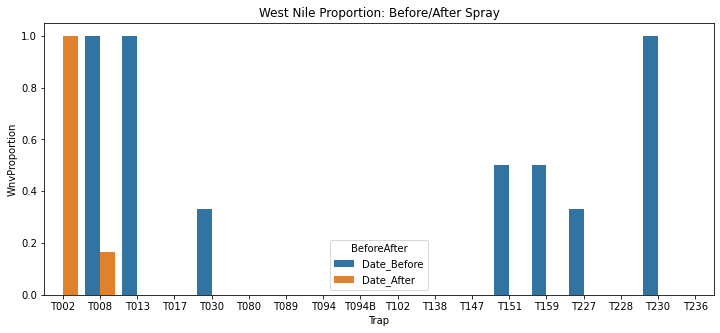

In [66]:
spray_before_after = df[df['IsSprayed'] == 1].groupby('Trap').agg({'Date':'min'}).reset_index()
spray_before_after = spray_before_after.rename(columns={'Date':'Date_After'})
spray_before_after = pd.merge(spray_before_after, df[['Trap','Date']], on='Trap', how='left')


#Drop rows where Date >= First_Spray_Date
drop_indices = spray_before_after[spray_before_after['Date'] >= spray_before_after['Date_After']].index
spray_before_after = spray_before_after.drop(drop_indices)
spray_before_after = spray_before_after.groupby('Trap').agg({'Date_After':'first', 'Date':'max'}).reset_index()

#Drop rows where before date >7 days before
spray_before_after = spray_before_after.rename(columns={'Date':'Date_Before'})
spray_before_after = spray_before_after[ \
    (spray_before_after['Date_After'] - spray_before_after['Date_Before']).dt.days <= 7]

#get mosquito counts
spray_before_after = pd.melt(spray_before_after, id_vars='Trap') \
    .rename(columns={'variable':'BeforeAfter','value':'Date'})
spray_before_after = pd.merge(spray_before_after, \
    df[['Trap','Date','NumMosquitos','NumTrapGroups','NumWnvPresent']], \
    on=['Trap','Date'])
spray_before_after['TotalMosquitos'] = spray_before_after['NumTrapGroups'] * spray_before_after['NumMosquitos']
spray_before_after['WnvProportion'] = spray_before_after['NumWnvPresent'] / spray_before_after['NumTrapGroups']
spray_before_after = \
    spray_before_after.groupby(['Trap','Date','BeforeAfter'])\
    .agg({'TotalMosquitos':'sum','WnvProportion':'mean'})\
    .reset_index()

#check mosquito differences
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(data=spray_before_after, x='Trap', y='TotalMosquitos', hue='BeforeAfter');
ax.set_title('Mosquito Count: Before/After Spray');

#check Wnv Proportion Differences
fig,ax = plt.subplots(figsize=(12,5))
sns.barplot(data=spray_before_after, x='Trap', y='WnvProportion', hue='BeforeAfter');
ax.set_title('West Nile Proportion: Before/After Spray');

Interestingly, although spraying does not necessarily seem to reduce the number of mosquitos it does seem to reduce the proportion of traps containing West Nile. It is possible that mosquitos breed more quickly than the rate at which West Nile propagates through their population. This would mean that by the time traps are checked, mosquitos have had time to regenerate their numbers but West Nile has not yet had a chance to reach prior levels.

**InSprayBounds:**

An InSprayBounds flag will indicate that a trap was within the max/min latitude/longitude boundaries of all spray zones (up to that point in the year)

In [67]:
#Create InSprayBounds column
spray_bounds = df_spray.groupby('Date').agg({'Latitude':['min','max'],'Longitude':['min','max']})
spray_bounds.columns = ['Latitude_min','Latitude_max','Longitude_min','Longitude_max']
spray_bounds = spray_bounds.reset_index()

#get updated SprayBounds coordinates after each spray date
spray_bounds['Year_temp'] = spray_bounds['Date'].dt.year

for i in range(spray_bounds.shape[0]):
    if (i==0):
        continue
        
    if (spray_bounds.loc[i,'Year_temp'] != spray_bounds.loc[i-1,'Year_temp']):
        continue
        
    if (spray_bounds.loc[i,'Latitude_min'] > spray_bounds.loc[i-1,'Latitude_min']):
        spray_bounds.loc[i,'Latitude_min'] = spray_bounds.loc[i-1,'Latitude_min']
        
    if (spray_bounds.loc[i,'Longitude_min'] > spray_bounds.loc[i-1,'Longitude_min']):
        spray_bounds.loc[i,'Longitude_min'] = spray_bounds.loc[i-1,'Longitude_min']
        
    if (spray_bounds.loc[i,'Latitude_max'] < spray_bounds.loc[i-1,'Latitude_max']):
        spray_bounds.loc[i,'Latitude_max'] = spray_bounds.loc[i-1,'Latitude_max']
        
    if (spray_bounds.loc[i,'Longitude_max'] < spray_bounds.loc[i-1,'Longitude_max']):
        spray_bounds.loc[i,'Longitude_max'] = spray_bounds.loc[i-1,'Longitude_max']

spray_bounds.drop(columns='Year_temp',inplace=True)

#merge the most current spray bound coordinates for each date
df_list = []
for year in df['Date'].dt.year.unique():
    temp_df_year = pd.merge_asof(df[df['Date'].dt.year==year],spray_bounds[spray_bounds['Date'].dt.year==year])
    df_list.append(temp_df_year)
    
temp_df = pd.concat(df_list)
temp_df = temp_df.reset_index(drop=True)

#set InSprayBounds to 1 if coordinates are in the spray bounds, otherwise 0
temp_df['InSprayBounds'] = np.where(((temp_df['Latitude'] >= temp_df['Latitude_min']) &
                                    (temp_df['Latitude'] <= temp_df['Latitude_max']) &
                                    (temp_df['Longitude'] >= temp_df['Longitude_min']) &
                                    (temp_df['Longitude'] <= temp_df['Longitude_max'])), 
                                    1,0)

#drop the temporary columns
temp_df.dropna(axis=1, inplace=True)
df = temp_df

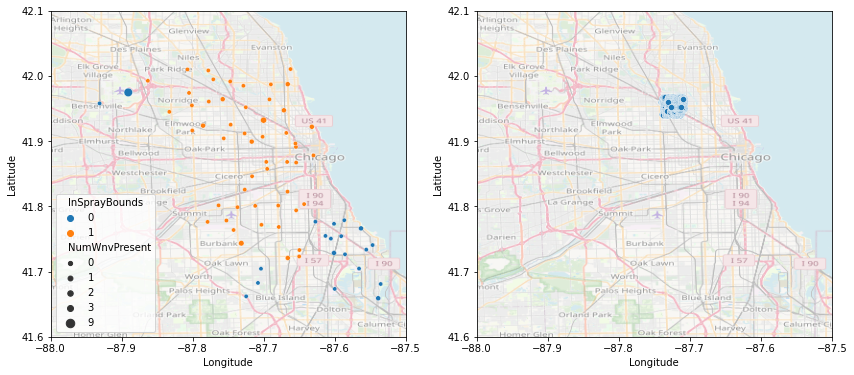

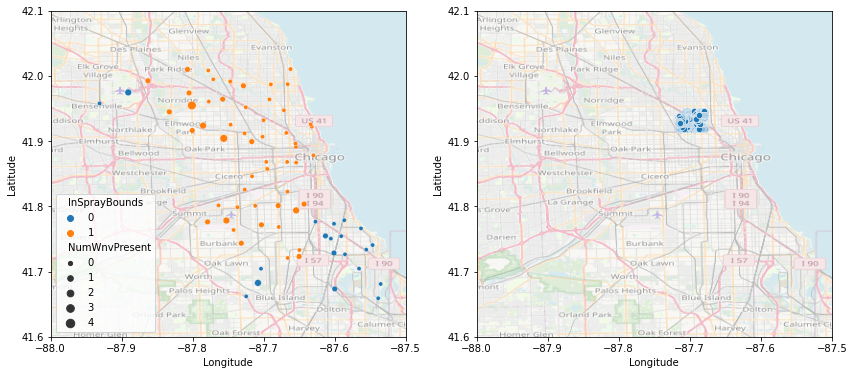

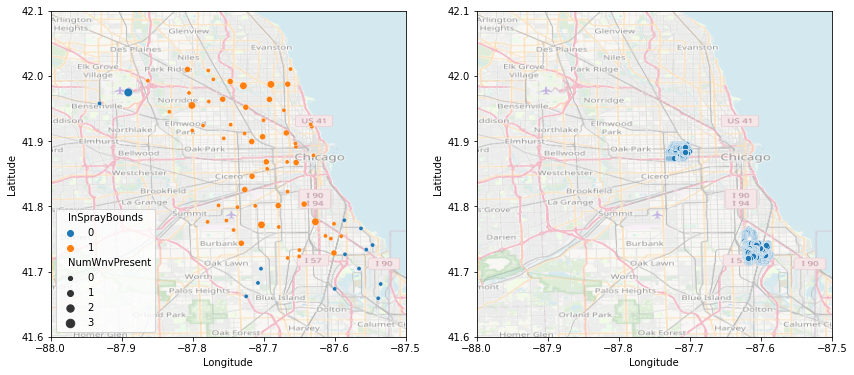

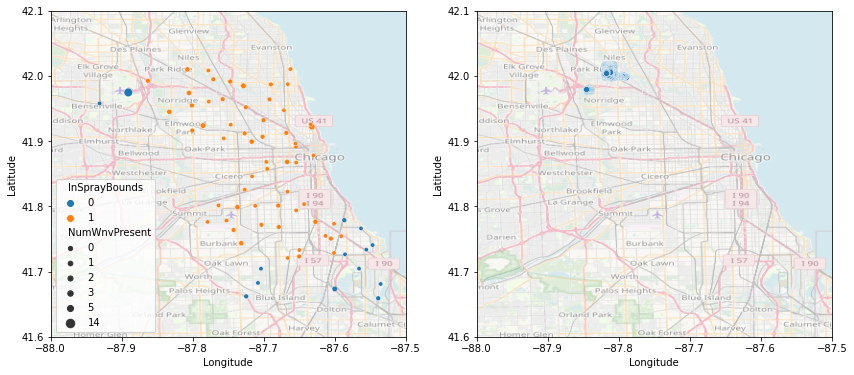

In [68]:
#Check the impact of InSprayBounds on West Nile Presence
for i in range(len(df_spray['Date'].unique())):
    date = df_spray['Date'].unique()[i]
    
    if (i < len(df_spray['Date'].unique()) - 2):
        next_date = df_spray['Date'].unique()[i+1]
    else:
        next_date = df['Date'].max()
    
    temp_df = df[(df['Date'] >= date) & (df['Date'] < next_date)]
    
    if (temp_df.shape[0] > 0):
    
        temp_df = temp_df.groupby('Trap').agg({'Latitude':'first','Longitude':'first','InSprayBounds':'max',
                                               'NumWnvPresent':'sum'}) \
            .reset_index()

        fig, ax = plt.subplots(1,2, figsize = (14,6));
        for a in ax:
            a.set_xlim(BBox[0], BBox[1])
            a.set_ylim(BBox[2], BBox[3])
            a.imshow(map_img, alpha=0.5, extent=BBox, zorder=0, aspect='auto');

        sns.scatterplot(data=temp_df, x='Longitude', y='Latitude', hue='InSprayBounds', size='NumWnvPresent', ax=ax[0]);
        sns.scatterplot(data=df_spray[df_spray['Date'] == date], x='Longitude', y='Latitude', ax=ax[1])
        

In [69]:
#Check WnvProportion for InSprayBound groups
data = df.groupby('InSprayBounds').agg({'NumTrapGroups':'sum','NumWnvPresent':'sum'}).reset_index()
data['WnvProportion'] = data.apply(lambda x : x['NumWnvPresent'] / x['NumTrapGroups'], axis=1)

sns.barplot(data=data, x='InSprayBounds', y='WnvProportion');

Based on the above analysis, InSprayBounds does not appear to be a good West Nile predictor. It will be dropped.

In [70]:
df.drop(columns='InSprayBounds', inplace=True)

## Feature Selection:

Based on the above analysis:
* Month column will be used to reflect seasonality
* Tavg_1 and Tavg_2 will be averaged for a temperature feature
* PrecipTotal_1 will be used for precipitation
* Wind_AvgSpeed_2 will be used for wind speed
* NumMosquitos and NumTrapGroups will be used to reflect mosquito count in a given Trap
* Latitude/Longitude will be used to reflect location
* An annual precipitation column will be created to capture the contradiction between the impact of daily rainfall vs. annual rainfall on West Nile presence
* IsSprayed will indicate that a trap was in a spray zone within the last 30 days
* Species will be used to reflect differences in West Nile among species.

In [71]:
#Create the Tavg column and drop Tavg_1, Tavg_2
df['Tavg'] = df[['Tavg_1','Tavg_2']].mean(axis=1)
df.drop(columns=['Tavg_1','Tavg_2'], inplace=True)

In [72]:
#Drop PrecipTotal_2 and rename PrecipTotal_1 --> DailyPrecip
df.rename(columns={'PrecipTotal_1':'DailyPrecip'}, inplace=True)
df.drop(columns='PrecipTotal_2', inplace=True)

In [73]:
#Drop Wind_AvgSpeed_1 and rename Wind_AvgSpeed_2 --> Wind_AvgSpeed
df.rename(columns={'Wind_AvgSpeed_2':'Wind_AvgSpeed'}, inplace=True)
df.drop(columns='Wind_AvgSpeed_1', inplace=True)

In [74]:
#Create AnnualPrecip column
annual_precip = df.groupby('Year').agg({'DailyPrecip':'mean'}).reset_index()
annual_precip.rename(columns={'DailyPrecip':'AnnualPrecip'}, inplace=True)
df = pd.merge(df, annual_precip, how='left', on='Year')

In [75]:
df.columns

Index(['Date', 'Trap', 'Species', 'Latitude', 'Longitude', 'NumMosquitos',
       'NumTrapGroups', 'WnvPresent', 'NumWnvPresent', 'Year', 'Month',
       'DailyPrecip', 'Wind_AvgSpeed', 'IsSprayed', 'Tavg', 'AnnualPrecip'],
      dtype='object')

The following features will be dropped, as they will not be used for prediction:
* Date
* Trap
* NumWnvPesent (can't be used since it was derived from the target variable)
* Year

In [76]:
df.drop(columns=['Date','Trap','NumWnvPresent','Year'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8169 entries, 0 to 8168
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Species        8169 non-null   object  
 1   Latitude       8169 non-null   float64 
 2   Longitude      8169 non-null   float64 
 3   NumMosquitos   8169 non-null   float64 
 4   NumTrapGroups  8169 non-null   int64   
 5   WnvPresent     8169 non-null   int64   
 6   Month          8169 non-null   category
 7   DailyPrecip    8169 non-null   float64 
 8   Wind_AvgSpeed  8169 non-null   float64 
 9   IsSprayed      8169 non-null   int64   
 10  Tavg           8169 non-null   float64 
 11  AnnualPrecip   8169 non-null   float64 
dtypes: category(1), float64(7), int64(3), object(1)
memory usage: 774.0+ KB


In [78]:
#save the combined data
datapath = '../data'
save_file(df, 'data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)y
Writing file.  "../data\data_cleaned.csv"
